# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

# Introduction/Business Problem

The problem is that sometimes we are making a trip and in the middle of the road there was a collision and you have to wait two hours until all the accident area had taken care. So is there a way to predict this accident?

The main idea is to predict an accident by some data that include weather, road condition, location, severity of the accident, type of coallision, etc.

# Data

The Data atributes will be: 
    - SHAPE: x and y location
    - ADDRTYPE: type of address can be Alley, Block or Intersection
    - SEVERITYCODE: tells the severity of the collision can be: 3—fatality, 2b—serious injury, 2—injury, 1—prop damage, 0—unknown.
    - COLLISIONTYPE: type of collision
    - PERSONCOUNT: number of people that were involved in the accident.
    - PEDCOUNT: number of pedestrians that were involved in the accident.
    - PEDCYLCOUNT: number of bicycles that were involved in the accident.
    - VEHCOUNT:number of vehicles that were involved in the accident.
    - JUNCTIONTYPE: type  of junction at the place of the accident.
    - UNDERINFL: driver that was found involved was under the influence of drugs or alcohol?
    - WEATHER: type of wather during accident.
    - ROADCOND: condition of the road during accident.
    - LIGHTCOND: condition of the light during accident.
    - HITPARKEDCAR: in the accident a car that was parked was hit? (Y/N)

### How it will be used to solve the problem

The idea of the data is to predict the severity of an accident, all variables except SEVERITYCODE are the independent variables and SEVERITYCODE y the dependent. First stage is the cleaning data, then design a machine learning model, train and validate it, and after that will display a graph to explain the conclusion.

### Data Preparation

In [228]:
# Import libraries
import numpy as np
import pandas as pd

# Import data set
df = pd.read_csv('Data-Collisions.csv')

/Users/leoin/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [229]:
# Delete columns that will not be use
df.drop(['OBJECTID', 'INCKEY', 'INATTENTIONIND', 'PEDROWNOTGRNT', 'SPEEDING','SDOTCOLNUM','ST_COLCODE','SDOT_COLCODE','COLDETKEY', 'REPORTNO', 'INTKEY', 'EXCEPTRSNCODE','SEGLANEKEY', 'CROSSWALKKEY', 'SEVERITYDESC','SEVERITYCODE.1','LOCATION', 'EXCEPTRSNDESC', 'STATUS', 'INCDATE' , 'ST_COLDESC', 'SDOT_COLDESC', 'INCDTTM'], axis=1, inplace=True)
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,Angles,2,0,0,2,At Intersection (intersection related),N,Overcast,Wet,Daylight,N
1,1,-122.347294,47.647172,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,N
2,1,-122.334540,47.607871,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,N
3,1,-122.334803,47.604803,Block,Other,3,0,0,3,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,N
4,2,-122.306426,47.545739,Intersection,Angles,2,0,0,2,At Intersection (intersection related),0,Raining,Wet,Daylight,N


#### Nulls

In [156]:
# Identify and delete rows nulls in X, COLLISIONTYPE, JUNCTIONTYPE, UNDERINFL, WEATHER, ROADCOND, LIGHTCOND
df = df.drop(df[df['X'].isna() == True].index)
df = df.drop(df[df['COLLISIONTYPE'].isna() == True].index)
df = df.drop(df[df['JUNCTIONTYPE'].isna() == True].index)
df = df.drop(df[df['UNDERINFL'].isna() == True].index)
df = df.drop(df[df['WEATHER'].isna() == True].index)
df = df.drop(df[df['ROADCOND'].isna() == True].index)
df = df.drop(df[df['LIGHTCOND'].isna() == True].index)

#### Strings to Categorical type

In [168]:
x = df.iloc[:, 1:16].values # Independientes Variables
y = df.iloc[:, 0].values # Variables Dependientes

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder_X_1 = LabelEncoder() # ADDRTYPE
x[:, 2] = labelencoder_X_1.fit_transform(x[:, 2])

labelencoder_X_1 = LabelEncoder() # COLLISIONTYPE
x[:, 3] = labelencoder_X_1.fit_transform(x[:, 3])

labelencoder_X_1 = LabelEncoder() # JUNCTIONTYPE
x[:, 8] = labelencoder_X_1.fit_transform(x[:, 8])

labelencoder_X_1 = LabelEncoder() # UNDERINFL
x[:, 9] = labelencoder_X_1.fit_transform(x[:, 9])

labelencoder_X_1 = LabelEncoder() # WEATHER
x[:, 10] = labelencoder_X_1.fit_transform(x[:, 10])

labelencoder_X_1 = LabelEncoder() # ROADCOND
x[:, 11] = labelencoder_X_1.fit_transform(x[:, 11])

labelencoder_X_1 = LabelEncoder() # LIGHTCOND
x[:, 12] = labelencoder_X_1.fit_transform(x[:, 12])

labelencoder_X_1 = LabelEncoder() # HITPARKEDCAR
x[:, 13] = labelencoder_X_1.fit_transform(x[:, 13])

  
#### Split data to Train a Test

In [169]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

 
#### Scale Data

In [170]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

# Methodology 

To make this proyect we are going to follow this steps:
      - Data preparation: prepare data for our analysis
      - Analysis: design deep learning model and train it until the accuracy is more than 70%
      - Results: explain the results of our analysis
      - Conclusion: brief conslusion of our work

### Hypotesis

We are going to make a deep learning model to see if we can predict trafict accidents, the idea is to see if the model can be at least 70 percent accuracy with data that dosen´t know. I will split data in training and test datasets and  test data is the information that is new for the deep learning model.

### Modeling

In [234]:
import keras
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Dropout 


# Inicializar la RNA
classifier = Sequential()


# Añadir las capas de Entradas y primera capa Oculta
nodes = 46681
classifier.add(Dense(units = nodes,kernel_initializer="uniform",activation="relu", input_dim=x_train.shape[1])) 
classifier.add(Dropout(rate = 0.1))


# Añadir la capa de Salida
classifier.add(Dense(units = 1,kernel_initializer="uniform",activation="sigmoid")) 



# Compilar la RNA
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])


# Entrenamos la RNA
classifier.fit(x = x_train , y = y_train, batch_size = 5000, epochs = 20)


# Save Model
classifier.save("ann_model.h5")

Exception ignored in: <function TF_Output.<lambda> at 0x7fc637de09e0>
Traceback (most recent call last):
  File "/Users/leoin/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 1057, in <lambda>
    __del__ = lambda self: None
KeyboardInterrupt


Epoch 1/20
  5000/144053 [>.............................] - ETA: 2:16 - loss: 0.7458 - accuracy: 0.3296

KeyboardInterrupt: 

### Results of Training
I have to train in Spyder of Anaconda because here the resaults were terrible, the folloring image are the results of the training of the ANN that are above:

![title](1.png)

### Evaluation

In [240]:
# Load Model
from keras.models import load_model
classifier = load_model("ann_model.h5")

# Predict with testing data
y_pred  = classifier.predict(x_test) 
y_pred_bool = (y_pred > 0.5) 

# elaborate confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_bool)
accurracy = (cm[0,0] + cm[1,1]) / cm.sum()
print("\nAccuraccy:", accurracy)


Accuraccy: 0.04381629366357528


The confussion matrix and the accuracy in Spyder was the following:

![title](2.png)

# Results and Disussion

To see better the results i made a plot of the confussion matrix:

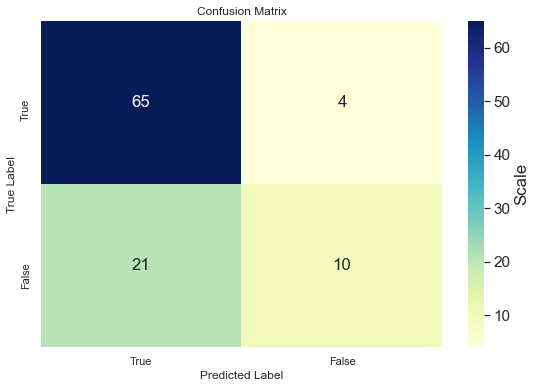

In [262]:
import seaborn
import matplotlib.pyplot as plt
 
 
def plot_confusion_matrix(data, labels):
    seaborn.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
 
    plt.title("Confusion Matrix")
 
    seaborn.set(font_scale=1.4)
    ax = seaborn.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
 
    ax.set(ylabel="True Label", xlabel="Predicted Label")
 
    #plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    plt.show()
 
# define data
cm = np.array([[23265,  1578],[ 7398,  3773]])
data = (cm / cm.sum()) * 100
data[0][0] = round(data[0][0])
data[0][1] = round(data[0][1])
data[1][0] = round(data[1][0])
data[1][1] = round(data[1][1])
 
# define labels
labels = ["True", "False"]
 
# create confusion matrix
plot_confusion_matrix(data, labels)

In the plot we can see the percentage of all posible options in the confussion matrix, if we sum 65% with 10% we get 75% that the model predict one value and the reality was correct, so we can say that our model have an accuracy of it, and if we sum 21% with 4% is 25% that the model predict one value and the reality was the other values.

# Conclusion

In this proyecto we started with a data that wasn´t prepared for any machine learning model, so we had to prepare them, then we design a artificial neuran network to predict future accidents, and then we explain the results.

Our objective was to achive a model that had 70% of accuracy and we get 75% so the results are greats, we end up deploying a model that can give us a trend of a posible accident, imagine of going on a trip and have a deep learning model that can help us avoid posible incidents, now we have it!